# Drug Design Assistant Using SMILES

Simplified molecular-input line-entry system (SMILES) is a special linear representation of a chemical compound. For example the moelcular formula of Caffeine is C8H10N4O2 while its SMILES is CN1C=NC2=C1C(=O)N(C(=O)N2C)C. SMILES retains some amount of its structural information and at the same time is easy to be processed by a machine.

This project aims to make use of SMILES to assist in the drug design process. Since the structural information is retained, it means that it is possible to make some prediction of the properties of a compound based on just its SMILES string.

Make use of Kow as a proof of concept and train embeddings of SMILES.

# Import

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# SMILES Processing

### Tokenize SMILES by Character

In [2]:
smiles_df = pd.read_csv('./data/release/logP_labels.csv')

smiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14176 entries, 0 to 14175
Data columns (total 2 columns):
SMILES    14176 non-null object
Kow       14176 non-null float64
dtypes: float64(1), object(1)
memory usage: 221.6+ KB


In [3]:
smiles_df

,SMILES,Kow
0,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885
1,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190
2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100
3,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470
4,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400
5,CCC1(CC)C(=O)NC(=O)N(C)C1=O,1.150
6,CCC1(c2ccccc2)NC(=O)N(C)C1=O,1.690
7,O=P1(N(CCCl)CCCl)NCCCO1,0.630
8,CC(O)C(=O)O,-0.720
9,CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C(C(=O)CO)CCC12,1.940


In [4]:
smiles_df.SMILES.str.len().max()

167

In [5]:
tokenizer = Tokenizer(lower=False, char_level=True)
tokenizer.fit_on_texts(smiles_df['SMILES'])

print(tokenizer.word_index)

{'c': 1, 'C': 2, '(': 3, ')': 4, 'O': 5, '1': 6, '=': 7, 'N': 8, '2': 9, 'n': 10, 'l': 11, '[': 12, ']': 13, '3': 14, '-': 15, 'S': 16, 'F': 17, '+': 18, 'H': 19, '4': 20, '#': 21, 'B': 22, 'r': 23, 'o': 24, 's': 25, 'P': 26, 'I': 27, '5': 28, '6': 29, 'i': 30, '7': 31, 'e': 32, 'A': 33}


In [6]:
token_dict = tokenizer.word_index

In [7]:
tokenized_smiles = smiles_df['SMILES'].apply(list)
tokenized_smiles.shape

(14176,)

In [8]:
tokenized_smiles

0        [C, C, 1, C, C, 2, C, 3, C, C, C, 4, =, C, C, ...
1        [C, C, (, =, O, ), O, C, C, (, =, O, ), C, 1, ...
2        [C, C, (, =, O, ), O, C, C, (, =, O, ), C, 1, ...
3        [C, C, C, 1, (, c, 2, c, c, c, c, c, 2, ), C, ...
4        [C, O, C, 1, 2, C, (, C, O, C, (, N, ), =, O, ...
5        [C, C, C, 1, (, C, C, ), C, (, =, O, ), N, C, ...
6        [C, C, C, 1, (, c, 2, c, c, c, c, c, 2, ), N, ...
7        [O, =, P, 1, (, N, (, C, C, C, l, ), C, C, C, ...
8                        [C, C, (, O, ), C, (, =, O, ), O]
9        [C, C, 1, 2, C, C, C, (, =, O, ), C, =, C, 1, ...
10       [C, C, 1, 2, C, C, C, (, =, O, ), C, =, C, 1, ...
11       [C, C, 1, 2, C, =, C, C, (, =, O, ), C, =, C, ...
12       [C, C, 1, 2, C, C, C, 3, c, 4, c, c, c, (, O, ...
13       [C, C, 1, 2, C, C, C, 3, c, 4, c, c, c, (, O, ...
14       [C, l, c, 1, c, c, c, (, C, (, c, 2, c, c, c, ...
15       [O, =, C, (, O, ), c, 1, c, (, C, l, ), c, c, ...
16       [c, 1, c, c, c, 2, c, (, c, 1, ), c, c, 1, c, .

### Convert SMILES Tokens to Indices

In [9]:
def to_word_indices(smiles_tokens):
    smiles_indices = []
    for token in smiles_tokens:
        smiles_indices.append(token_dict[token])
    
    return smiles_indices

In [10]:
tokenized_smiles_indices = tokenized_smiles.apply(to_word_indices)

In [11]:
tokenized_smiles_indices

0        [2, 2, 6, 2, 2, 9, 2, 14, 2, 2, 2, 20, 7, 2, 2...
1        [2, 2, 3, 7, 5, 4, 5, 2, 2, 3, 7, 5, 4, 2, 6, ...
2        [2, 2, 3, 7, 5, 4, 5, 2, 2, 3, 7, 5, 4, 2, 6, ...
3        [2, 2, 2, 6, 3, 1, 9, 1, 1, 1, 1, 1, 9, 4, 2, ...
4        [2, 5, 2, 6, 9, 2, 3, 2, 5, 2, 3, 8, 4, 7, 5, ...
5        [2, 2, 2, 6, 3, 2, 2, 4, 2, 3, 7, 5, 4, 8, 2, ...
6        [2, 2, 2, 6, 3, 1, 9, 1, 1, 1, 1, 1, 9, 4, 8, ...
7        [5, 7, 26, 6, 3, 8, 3, 2, 2, 2, 11, 4, 2, 2, 2...
8                        [2, 2, 3, 5, 4, 2, 3, 7, 5, 4, 5]
9        [2, 2, 6, 9, 2, 2, 2, 3, 7, 5, 4, 2, 7, 2, 6, ...
10       [2, 2, 6, 9, 2, 2, 2, 3, 7, 5, 4, 2, 7, 2, 6, ...
11       [2, 2, 6, 9, 2, 7, 2, 2, 3, 7, 5, 4, 2, 7, 2, ...
12       [2, 2, 6, 9, 2, 2, 2, 14, 1, 20, 1, 1, 1, 3, 5...
13       [2, 2, 6, 9, 2, 2, 2, 14, 1, 20, 1, 1, 1, 3, 5...
14       [2, 11, 1, 6, 1, 1, 1, 3, 2, 3, 1, 9, 1, 1, 1,...
15       [5, 7, 2, 3, 5, 4, 1, 6, 1, 3, 2, 11, 4, 1, 1,...
16       [1, 6, 1, 1, 1, 9, 1, 3, 1, 6, 4, 1, 1, 6, 1, .

### Pad Each Sequence & Data Split

In [12]:
maxlen = 170

tokenized_smiles_indices = preprocessing.sequence.pad_sequences(tokenized_smiles_indices, maxlen=maxlen, padding='post', truncating='post')

In [13]:
tokenized_smiles_indices

array([[ 2,  2,  6, ...,  0,  0,  0],
       [ 2,  2,  3, ...,  0,  0,  0],
       [ 2,  2,  3, ...,  0,  0,  0],
       ...,
       [16,  7,  2, ...,  0,  0,  0],
       [16,  7,  1, ...,  0,  0,  0],
       [ 8,  7, 12, ...,  0,  0,  0]], dtype=int32)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(tokenized_smiles_indices, smiles_df['Kow'], test_size=0.2, random_state=42)

In [15]:
x_train.shape

(11340, 170)

In [16]:
x_test.shape

(2836, 170)

In [17]:
x_val = x_train[:2500]
partial_x_train = x_train[2500:]
y_val = y_train[:2500]
partial_y_train = y_train[2500:]

# Baseline Model

### Epoch Tuning

In [18]:
embedding_size = len(token_dict) + 1

In [19]:
model = keras.Sequential()
model.add(keras.layers.Embedding(embedding_size, 8, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 170, 8)            272       
_________________________________________________________________
flatten (Flatten)            (None, 1360)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                21776     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 22,065
Trainable params: 22,065
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [21]:
history = model.fit(partial_x_train, partial_y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val))

Train on 8840 samples, validate on 2500 samples
Epoch 1/100
8840/8840 [==============================] - 1s 92us/sample - loss: 1.9158 - mae: 1.0230 - val_loss: 1.4606 - val_mae: 0.9159
Epoch 2/100
8840/8840 [==============================] - 1s 67us/sample - loss: 1.2546 - mae: 0.8164 - val_loss: 1.2295 - val_mae: 0.8303
Epoch 3/100
8840/8840 [==============================] - 1s 68us/sample - loss: 1.1744 - mae: 0.7925 - val_loss: 1.1293 - val_mae: 0.7889
Epoch 4/100
8840/8840 [==============================] - 1s 73us/sample - loss: 1.1133 - mae: 0.7714 - val_loss: 1.1680 - val_mae: 0.8119
Epoch 5/100
8840/8840 [==============================] - 1s 69us/sample - loss: 1.0549 - mae: 0.7536 - val_loss: 1.1663 - val_mae: 0.8149
Epoch 6/100
8840/8840 [==============================] - 1s 66us/sample - loss: 1.0005 - mae: 0.7391 - val_loss: 1.0323 - val_mae: 0.7562
Epoch 7/100
8840/8840 [==============================] - 1s 67us/sample - loss: 0.9481 - mae: 0.7176 - val_loss: 1.0069 - va

8840/8840 [==============================] - 1s 68us/sample - loss: 0.2962 - mae: 0.4067 - val_loss: 1.0329 - val_mae: 0.7280
Epoch 60/100
8840/8840 [==============================] - 1s 69us/sample - loss: 0.2936 - mae: 0.4052 - val_loss: 1.0425 - val_mae: 0.7312
Epoch 61/100
8840/8840 [==============================] - 1s 75us/sample - loss: 0.2916 - mae: 0.4048 - val_loss: 1.0375 - val_mae: 0.7334
Epoch 62/100
8840/8840 [==============================] - 1s 65us/sample - loss: 0.2873 - mae: 0.4017 - val_loss: 1.0334 - val_mae: 0.7299
Epoch 63/100
8840/8840 [==============================] - 1s 72us/sample - loss: 0.2863 - mae: 0.4002 - val_loss: 1.0433 - val_mae: 0.7327
Epoch 64/100
8840/8840 [==============================] - 1s 72us/sample - loss: 0.2832 - mae: 0.3968 - val_loss: 1.0390 - val_mae: 0.7307
Epoch 65/100
8840/8840 [==============================] - 1s 65us/sample - loss: 0.2779 - mae: 0.3939 - val_loss: 1.0596 - val_mae: 0.7345
Epoch 66/100
8840/8840 [================

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

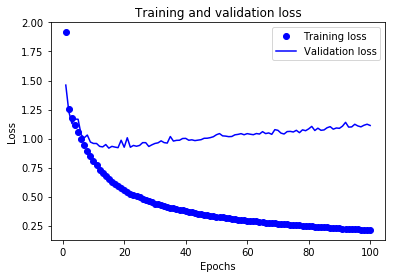

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 100 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
history.history

{'loss': [1.9158423207464261,
  1.2546174784051887,
  1.17442202746059,
  1.1133025539406824,
  1.0549355061615215,
  1.0005042564545281,
  0.9480594333480387,
  0.8949382637151226,
  0.8504682902027579,
  0.8045912379592792,
  0.7683410233771639,
  0.7297080270170626,
  0.7023342439626676,
  0.6760466111731206,
  0.6499925273036525,
  0.6301705111745256,
  0.6101187302650909,
  0.5888985931064209,
  0.5722405006443213,
  0.5562781382874665,
  0.5430950624101302,
  0.5253458486962642,
  0.5152175250973098,
  0.5040042680987405,
  0.49265434363039373,
  0.4785652623322215,
  0.47017520399115204,
  0.459170791014557,
  0.4515034364359411,
  0.4396752627996298,
  0.4367044990283871,
  0.42822204048816975,
  0.41760556411958927,
  0.41294379363772016,
  0.4060523496763739,
  0.39916568104497985,
  0.3922987825190859,
  0.38699746375979344,
  0.3812894407912617,
  0.37499369323523335,
  0.3717985461874785,
  0.3640710670079581,
  0.3566119333535298,
  0.35278993839591877,
  0.34908000035253

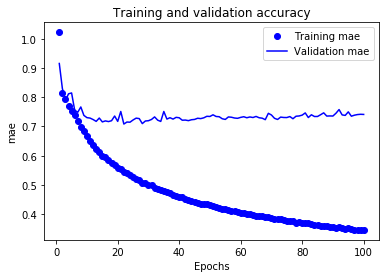

In [36]:
plt.clf()
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
plt.plot(epochs, mae_values, 'bo', label='Training mae')
plt.plot(epochs, val_mae_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

### Retrain Model with Tuned Epoch

In [37]:
model = keras.Sequential()
model.add(keras.layers.Embedding(embedding_size, 8, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=16, batch_size=16)

Epoch 1/16
11340/11340 [==============================] - 1s 66us/sample - loss: 2.2187 - mae: 1.1015
Epoch 2/16
11340/11340 [==============================] - 1s 61us/sample - loss: 1.2755 - mae: 0.8261
Epoch 3/16
11340/11340 [==============================] - 1s 60us/sample - loss: 1.1897 - mae: 0.7989
Epoch 4/16
11340/11340 [==============================] - 1s 60us/sample - loss: 1.1294 - mae: 0.7811
Epoch 5/16
11340/11340 [==============================] - 1s 56us/sample - loss: 1.0716 - mae: 0.7615
Epoch 6/16
11340/11340 [==============================] - 1s 55us/sample - loss: 1.0059 - mae: 0.7379
Epoch 7/16
11340/11340 [==============================] - 1s 57us/sample - loss: 0.9406 - mae: 0.7151
Epoch 8/16
11340/11340 [==============================] - 1s 58us/sample - loss: 0.8810 - mae: 0.6940
Epoch 9/16
11340/11340 [==============================] - 1s 57us/sample - loss: 0.8224 - mae: 0.6724
Epoch 10/16
11340/11340 [==============================] - 1s 57us/sample - loss: 

In [38]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2836/2836 [==============================] - 0s 25us/sample - loss: 0.8183 - mae: 0.6772


In [39]:
test_mse_score

0.8182564246217354

In [40]:
test_mae_score

0.67719316

In [41]:
smiles_df['Kow'].max()

11.29

In [42]:
smiles_df['Kow'].min()

-5.4

In [ ]:
# error size is about +/- 4%